In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
import nltk as nlp
import nltk
import re

import warnings
warnings.filterwarnings('ignore')


ModuleNotFoundError: No module named 'wordcloud'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
dataset=pd.read_csv('Tweets.csv')

In [ ]:
dataset.head()

In [ ]:
dataset.columns

In [ ]:
dataset.isnull().sum()

In [7]:
dataset.shape

(14640, 15)

In [8]:
dataset.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


In [9]:
dataset['name'].nunique()

7701

In [10]:
df=dataset
df=df.loc[:,{"airline_sentiment","airline_sentiment_confidence","negativereason","negativereason_confidence","airline"}]
df.dropna(how='any',inplace=True)
df.pivot_table(index="airline",columns="negativereason")

airline_sentiment_confidence                              \
negativereason                   Bad Flight Can't Tell Cancelled Flight   
airline                                                                   
American                           0.923300   0.906555         0.934552   
Delta                              0.922756   0.835715         0.908245   
Southwest                          0.939736   0.848219         0.942170   
US Airways                         0.914438   0.911304         0.962562   
United                             0.928200   0.894266         0.944017   
Virgin America                     0.916868   0.923368         0.891044   

                                                       \
negativereason Customer Service Issue Damaged Luggage   
airline                                                 
American                     0.959863        0.916358   
Delta                        0.925722        0.937200   
Southwest                    0.942311        0.955529   
US Airways                   0.963003        0.972100   
United                       0.944273        0.970355   
Virgin America               0.921997        1.000000   

                                                                    \
negativereason Flight Attendant Complaints Flight Booking Problems   
airline                                                              
American                          0.974301                0.902346   
Delta                             0.935958                0.826011   
Southwest                         0.923021                0.820946   
US Airways                        0.957300                0.882081   
United                            0.948615                0.891019   
Virgin America                    0.930860                0.857132   

                                                  negativereason_confidence  \
negativereason Late Flight Lost Luggage longlines                Bad Flight   
airline                                                                       
American          0.953505     0.958483  0.938521                  0.592699   
Delta             0.928749     0.899958  0.901607                  0.669161   
Southwest         0.934595     0.929648  0.930252                  0.657552   
US Airways        0.939974     0.959883  0.965256                  0.586644   
United            0.944920     0.942010  0.953250                  0.638657   
Virgin America    0.847459     0.929460  0.804133                  0.730126   

                                                                   \
negativereason Can't Tell Cancelled Flight Customer Service Issue   
airline                                                             
American         0.631318         0.795779               0.807090   
Delta            0.623325         0.754580               0.720568   
Southwest        0.589165         0.811308               0.780206   
US Airways       0.666058         0.770052               0.805301   
United           0.619057         0.764232               0.739390   
Virgin America   0.740195         0.763272               0.750595   

                                                            \
negativereason Damaged Luggage Flight Attendant Complaints   
airline                                                      
American              0.608142                    0.676123   
Delta                 0.620645                    0.663215   
Southwest             0.862114                    0.658250   
US Airways            0.767027                    0.694759   
United                0.756764                    0.627966   
Virgin America        0.748375                    0.540760   

                                                                           
negativereason Flight Booking Problems Late Flight Lost Luggage longlines  
airline                                                                    
American                      0.599570    0.736641     0.804509  0.587318

## Now for the initial data exploration

In [11]:
data=dataset[['airline_sentiment','text','airline','retweet_count']]
data.head()

,airline_sentiment,text,airline,retweet_count
0,neutral,@VirginAmerica What @dhepburn said.,Virgin America,0
1,positive,@VirginAmerica plus you've added commercials t...,Virgin America,0
2,neutral,@VirginAmerica I didn't today... Must mean I n...,Virgin America,0
3,negative,@VirginAmerica it's really aggressive to blast...,Virgin America,0
4,negative,@VirginAmerica and it's a really big bad thing...,Virgin America,0


### Lets start with the Exploratory Data analysis

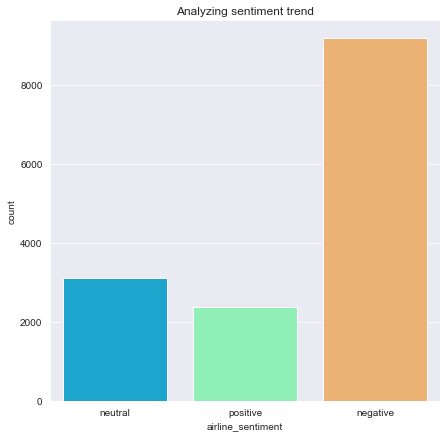

In [257]:
sns.set_style("darkgrid")
plt.figure(figsize=(7,7))
sns.countplot(x=data['airline_sentiment'],palette="rainbow")
plt.title('Analyzing sentiment trend')
plt.show()

> Basically from the above graph we can conclude that there has been heavy negative reviews about the US airlines in general

In [ ]:
plt.figure(figsize=(7,7))
sns.countplot(y=data['airline'],palette="Set2")
plt.title("Airline Count")
plt.show()

> United airline is the most popular on twitter.OfCourse, we will not be able to judge if the reviews about these airlines are positive or negative through this figure

In [ ]:
g = sns.FacetGrid(data, col='airline',col_wrap=2,sharex=False);
g.map(sns.countplot, 'airline_sentiment',palette='rainbow');
g.set_axis_labels("airline_sentiment", "Count")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle(r'Analysing the sentiment of the tweets for every airline', fontsize=16)

> Now we can observe the sentiment of the tweets for every airline. It is also very evident that we do not have enough information about virgin America airline to make a comment on the overall trend of the tweets.

> It is also very evident that US Airways , American offer very poor service and thus have a bad reputation among the customers

#### Moving onto data cleaning

In [ ]:
data.text.head(5)

In [ ]:
lemma = nlp.WordNetLemmatizer()
def preprocess(x):
    x=str(x)
    x=re.sub("[^a-zA-Z]"," ",x)
    x=x.lower()
    x=nlp.word_tokenize(x)
    x=[lemma.lemmatize(i) for i in x]
    x= " ".join(x)
    return x

data.text = data.text.apply(preprocess)
data.text[0:10]

### Now we are constructing a word cloud to better understand the specific words used , so as to better understand the intensity of the sentiments

In [ ]:
allcomments = " ".join(data.text)
wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    stopwords = STOPWORDS, 
                    min_font_size = 12).generate(allcomments) 
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud)
plt.title("All Tweets Wordcount")
plt.show()

> So from the above word cloud we can easily conclude that the most used words are United, SouthWest , Flight , jetblue , usairway , americanair 

#### The most Frequent Words in Negative Sentiment

In [ ]:
data_new_text=data.loc[data['airline_sentiment']=='negative','text']

In [ ]:
allnegativecomments = " ".join(data_new_text)
wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='black', 
                    stopwords = STOPWORDS, 
                    min_font_size = 12).generate(allnegativecomments) 
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.rcParams["axes.grid"] = False
plt.imshow(wordcloud)
plt.title("Analyzing Negative Tweets")
plt.show()

> We can see that united, usairways , americanair are appearing in the negative tweet section which is clearly indicative of their poor service.

#### Lets Now analyze the most frequently used specific negative words

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
pos_word_list=[]
neu_word_list=[]
neg_word_list=[]

for text in data_new_text:
    new_words=text.split(' ')
    for word in new_words:
            if (sid.polarity_scores(word)['compound']) >= 0.5:
                    pos_word_list.append(word)
            elif(sid.polarity_scores(word)['compound']) <= -0.5:
                    neg_word_list.append(word)
            else:
                neu_word_list.append(word)                

In [ ]:
len(neg_word_list)

In [ ]:
from profanity_check import predict, predict_prob
predict_negword=predict(neg_word_list)

> Now since there are 142 profane words present ,
we would want to remove or mask those

In [ ]:
df = pd.DataFrame({'Neg':neg_word_list, 'Neg_Predict':predict_negword})

In [ ]:
Unprofane=df.loc[df['Neg_Predict']==0,'Neg']

In [ ]:
df_1=pd.DataFrame({'Neg':Unprofane})
Freq=df_1['Neg'].value_counts()[0:]
Freq_index=df_1['Neg'].value_counts().index
Freq_index
df_1=pd.DataFrame({'Neg':Freq_index,'Neq_Frequency':Freq})

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x='Neg',y='Neq_Frequency',data=df_1[0:10],palette='rainbow')
plt.xticks(rotation=90);

> Reviewing the above barplot it can be seen that worst,bad, fail , horrible are one the most commonly used negative emotions in the tweets

#### Let us now try to look at the positive words similarly

In [ ]:
df_1 = pd.DataFrame({'Pos':pos_word_list})

In [ ]:
Freq=df_1['Pos'].value_counts()[0:]
Freq_index=df_1['Pos'].value_counts().index
df_1=pd.DataFrame({'Pos':Freq_index,'Pos_Frequency':Freq})

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x='Pos',y='Pos_Frequency',data=df_1[0:10],palette='rainbow')
plt.xticks(rotation=90);

> The Above barplot shows us the most used positive words in the tweets

### Lets now move on to deeper analysis of the negative reasons 

In [ ]:
df=pd.read_csv('Tweets.zip')
df['negativereason'].nunique()

NR_Count=dict(df['negativereason'].value_counts(sort=False))
def NR_Count(Airline):
    if Airline=='All':
        a=df
    else:
        a=df[df['airline']==Airline]
    count=dict(a['negativereason'].value_counts())
    Unique_reason=list(df['negativereason'].unique())
    Unique_reason=[x for x in Unique_reason if str(x) != 'nan']
    Reason_frame=pd.DataFrame({'Reasons':Unique_reason})
    Reason_frame['count']=Reason_frame['Reasons'].apply(lambda x: count[x])
    return Reason_frame
def plot_reason(Airline):
    
    a=NR_Count(Airline)
    count=a['count']
    Index = range(1,(len(a)+1))
    plt.bar(Index,count, color=['red','yellow','blue','green','black','brown','gray','cyan','purple','orange'])
    plt.xticks(Index,a['Reasons'],rotation=90)
    plt.ylabel('Count')
    plt.xlabel('Reason')
    plt.title('Count of Reasons for '+Airline,fontsize=15)
    
plot_reason('All')

In [ ]:
plt.figure(2,figsize=(13, 13))
airlines= ['US Airways','United','American','Southwest','Delta','Virgin America']
for i in airlines:
    indices= airlines.index(i)
    plt.subplot(2,3,indices+1)
    plt.subplots_adjust(hspace=0.9)
    plot_reason(i)  

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(data=dataset,x='negativereason',hue='airline',palette='gist_rainbow')
plt.xticks(rotation=45)
plt.show()

In [ ]:
%matplotlib inline
Df=df.loc[:,{"airline","airline_sentiment_confidence"}]
Df['airline_sentiment_confidence']=Df['airline_sentiment_confidence']*100
g=Df.groupby('airline')
g.mean()

In [ ]:
dft=df.loc[:,{'airline','airline_sentiment_confidence'}]
dft.dropna(how='any',inplace=True)
dft.groupby('airline').mean().plot(kind='kde',subplots=True,figsize=(15,10));
plt.title("distribution of the sentiment confidence", fontsize=20);

In [ ]:
%matplotlib inline
Df=df.loc[:,{"airline","negativereason_confidence"}]
Df['negativereason_confidence']=Df['negativereason_confidence']*100
g=Df.groupby('airline')
g.mean()

In [ ]:
dft=df.loc[:,{'airline','negativereason_confidence'}]
dft.dropna(how='any',inplace=True)
dft.groupby('airline').mean().plot(kind='kde',subplots=True,figsize=(15,10));
plt.title("distribution of the negative reason confidence", fontsize=20);

In [ ]:
df=dataset
df1=df.loc[:,{"airline_sentiment_confidence","negativereason","negativereason_confidence","airline"}]
plt.figure(figsize=(10,10))
df1.dropna(how='any',inplace=True)
sns.scatterplot(x=df1['airline_sentiment_confidence'],y=df1['negativereason_confidence'],hue=df1['airline'],size=df1['negativereason'],sizes=(1,100))
plt.show()

In [ ]:
def annotate(data, **kws):
  n = len(data)
  ax = plt.gca()
  ax.text(.1, .6, f"N = {n}", transform=ax.transAxes)

plt.figure(figsize=(20,10)) 
g=sns.FacetGrid(df, col="airline",height=5,col_wrap=3)
g.map_dataframe(sns.scatterplot, x="airline_sentiment_confidence", y="negativereason_confidence",hue="negativereason")
#g.set_axis_labels("Total bill", "Tip")
g.map_dataframe(annotate)

In [ ]:
df=dataset
df=df.loc[:,{"airline_sentiment_confidence","negativereason","negativereason_confidence","airline"}]
df.dropna(how='any',inplace=True)
plt.figure(figsize=(30,10))
sns.swarmplot(x=df['negativereason'],y=df['negativereason_confidence'])
sns.boxplot(x=df['negativereason'],y=df['negativereason_confidence'],palette=['#BDBDBD','#E0E0E0'],linewidth=6)

In [ ]:
airlines= ['US Airways','United','American','Southwest','Delta','Virgin America']
for i in airlines:
  plt.figure(figsize=(15,5))
  df1=df.loc[df['airline']==i,:]
  sns.boxplot(x=df1['negativereason'],y=df1['negativereason_confidence'])

In [ ]:
df['tweet_location'].fillna(method='bfill',inplace=True)

In [ ]:
data_index=df['tweet_location'].value_counts().index

In [ ]:
data_count=df['tweet_location'].value_counts().values

In [ ]:
df_1=pd.DataFrame({'Loc':data_index,'Tweet_count':data_count})

In [ ]:
df_1.sort_values('Tweet_count',inplace=True)

In [ ]:
ax = sns.barplot(x="Loc", y="Tweet_count", data=df_1[-10:],palette='rainbow');
plt.xticks(rotation=90);
plt.title('TOP 10 Tweet Locations');

### Let us now look at what the retweet statistics convey

In [ ]:
df.groupby('airline')['retweet_count'].count().plot(kind='bar',color='purple');

In [ ]:
data_count=df.groupby('airline')['retweet_count'].count()

In [ ]:
data_count

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20,20))
labels=data_count.index
markers = [0, 1, 2, 3, 4, 5]
str_markers = ["0", "1", "2", "3", "4", "5"]

def make_radar_chart(name, stats, attribute_labels = labels, plot_markers = markers, plot_str_markers = str_markers):
    angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
    stats = np.concatenate((stats,[stats[0]]))
    angles = np.concatenate((angles,[angles[0]]))

    fig= plt.figure()
    ax = fig.add_subplot(111, polar=True)
    ax.plot(angles, stats, 'o-', linewidth=2)
    ax.fill(angles, stats, alpha=0.25)
    ax.set_thetagrids(angles * 180/np.pi, labels,fontsize=12)
    plt.yticks(markers)
    ax.set_title(name)
    ax.grid(True)
    fig.subplots_adjust(top=0.9, bottom=0.08)
    return plt.show()

make_radar_chart("Flight retweet", data_count.values) 

#### Now lets try to look at how many retweets are present sentiment category wise for each airline

In [ ]:
data=df[['airline','airline_sentiment','retweet_count']]

In [ ]:
def data_airline(s,v):
    data=df.loc[((df['airline']==s) & (df['airline_sentiment']==v)),'retweet_count']
    return data.sum()

In [ ]:
labels=['America','Delta','Southwest','US Airways','United','Virgin America']
values=[]
values_neg=[]
values_nt=[]
for airline in labels:
    values.append(data_airline(airline,'positive'))
    values_neg.append(data_airline(airline,'negative'))
    values_nt.append(data_airline(airline,'neutral'))

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,10))
labels=['America','Delta','Southwest','US Airways','United','Virgin America']
markers = [0, 1, 2, 3, 4, 5]
str_markers = ["0", "1", "2", "3", "4", "5"]

def make_radar_chart(name, stats,attribute_labels = labels, plot_markers = markers, plot_str_markers = str_markers):
    angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
    stats = np.concatenate((stats,[stats[0]]))
    angles = np.concatenate((angles,[angles[0]]))

    fig= plt.figure()
    ax = fig.add_subplot(111, polar=True);
    ax.plot(angles, stats, 'o-', linewidth=2)
    ax.fill(angles, stats, alpha=0.25)
    ax.set_thetagrids(angles * 180/np.pi, labels,fontsize=12)
    ax.set_title(name)
    plt.xticks(markers)
    ax.grid(True)
    fig.subplots_adjust(top=0.9, bottom=0.08)
    return plt.show();

make_radar_chart("Flight positive retweets", values) ;

In [ ]:
make_radar_chart('Flight negative retweets',values_neg)

In [ ]:
make_radar_chart('Flight neutral retweets',values_nt)

In [ ]:
pip install geopy

In [ ]:
dataset.head()

In [ ]:
df1=df.loc[:,{'airline_sentiment','text'}]
sns.lineplot(x=df['airline_sentiment'],y=df['tl'])

In [ ]:
data.head()

In [13]:
def ct(tp):
    if(tp>=2):
        return "2+"
    else :
        return str(tp)


In [14]:
text=pd.DataFrame({})
text['TextLength']=data['text'].apply(lambda x: len(x))
text['airline_sentiment']=data['airline_sentiment']
text['tag_tweet']=data['text'].apply(lambda x: ct(x.count('@')))

In [15]:
text.head()

,TextLength,airline_sentiment,tag_tweet
0,35,neutral,2+
1,72,positive,1
2,71,neutral,1
3,126,negative,1
4,55,negative,1


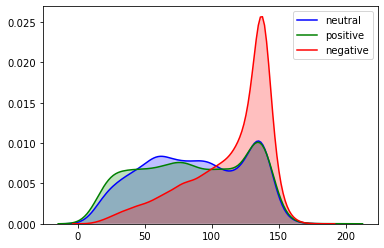

In [16]:
sns.kdeplot(text.loc[(text['airline_sentiment']=='neutral'), 
            'TextLength'], color='b', shade=True, Label='neutral')
sns.kdeplot(text.loc[(text['airline_sentiment']=='positive'), 
            'TextLength'], color='g', shade=True, Label='positive')
sns.kdeplot(text.loc[(text['airline_sentiment']=='negative'), 
            'TextLength'], color='r', shade=True, Label='negative')

In [17]:
tags_ct=text['tag_tweet'].unique()
tags_ct.sort()
tags_ct

array(['1', '2+'], dtype=object)

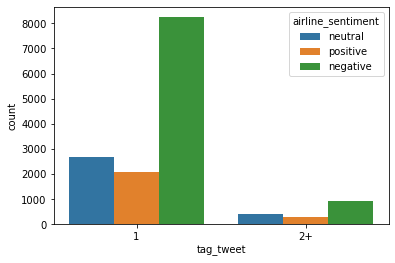

In [19]:
sns.countplot(x="tag_tweet",data=text,hue='airline_sentiment',order=['1','2+'],orient='v')
plt.plot(kind='bar',stacked=True)
plt.show()

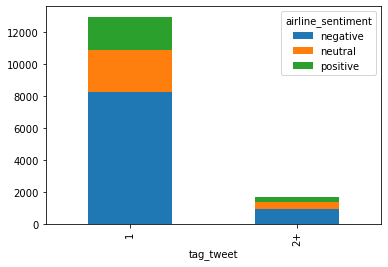

In [20]:
bar_plot = text.groupby(['airline_sentiment', 'tag_tweet']).size().reset_index().pivot(columns='airline_sentiment', index='tag_tweet', values=0)
bar_plot.plot(kind='bar', stacked=True)

In [21]:
text['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [22]:
color_palette_list = ['#EC6B56','#FFC154','#47B39C']

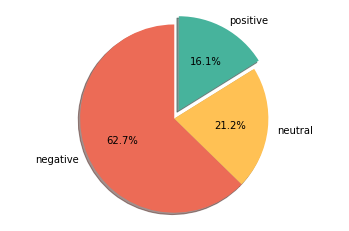

In [23]:
labels = 'negative', 'neutral', 'positive'
explode = (0, 0, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(text['airline_sentiment'].value_counts(), explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90,colors=color_palette_list)
ax1.axis('equal')  
plt.show()

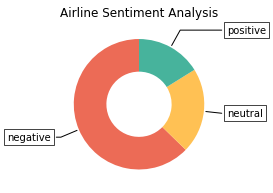

In [24]:
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

label = ['negative', 'neutral', 'positive']
data = text['airline_sentiment'].value_counts()

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=90,colors=color_palette_list)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(label[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.3*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Airline Sentiment Analysis")

plt.show()

In [25]:
text['airline_sentiment'].head(2).value_counts().size

2

In [26]:
text.size

43920

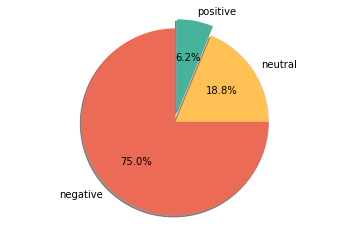

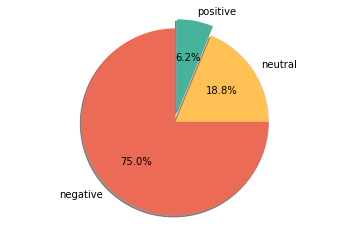

In [43]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'limegreen', 
          'red', 'navy', 'blue', 'magenta', 'crimson']
explode = (0.01, 0.01, 0.01)
#label = ['negative', 'neutral', 'positive']
#nums = [0,0,0] 
fig1, ax1 = plt.subplots()

def update(num):
    labels = 'negative', 'neutral', 'positive'
    explode = (0, 0, 0.1)
    nums=text['airline_sentiment'].head(num).value_counts()
    ax1.clear()
    # if(nums.size==3):
    #     num=nums
    # else:
    #     num=[0,0,0]
    ax1.pie(nums, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90,colors=color_palette_list)
    ax1.axis('equal')  
    plt.show()
ani = FuncAnimation(fig1, update, frames=range(16,500), repeat=False,interval=200)
plt.show()
ani.save('animation.gif', writer='imagemagick', fps=30)

In [27]:
text['tweet_created']=dataset['tweet_created'].apply(lambda x: pd.Timestamp(x))

In [28]:
text.set_index('tweet_created',inplace=True)

In [33]:
text = text.sort_values(by=['tweet_created'])

In [34]:
text.head()

,TextLength,airline_sentiment,tag_tweet
tweet_created,,,
2015-02-16 23:36:05-08:00,127,neutral,1
2015-02-16 23:43:02-08:00,55,negative,1
2015-02-16 23:48:48-08:00,115,negative,1
2015-02-16 23:52:20-08:00,140,negative,1
2015-02-17 00:00:36-08:00,139,negative,1


In [32]:
df3.head()

,TextLength,airline_sentiment,tag_tweet
tweet_created,,,
2015-02-16 23:36:05-08:00,127,neutral,1
2015-02-16 23:43:02-08:00,55,negative,1
2015-02-16 23:48:48-08:00,115,negative,1
2015-02-16 23:52:20-08:00,140,negative,1
2015-02-17 00:00:36-08:00,139,negative,1
